<a href="https://colab.research.google.com/github/ArunRamji/Price_suggestion_model/blob/main/Price_suggestion_model_for_e_commerce_product_PART_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import dataset from google drive 
!unzip -uq "/content/drive/My Drive/Datasets/Online_pricing_model.zip" -d "/Dataset"

In [ ]:
import pandas as pd
df_ = pd.read_csv('/content/drive/My Drive/Datasets/ecommerce_df.csv')

In [ ]:
df_.head()

,Unnamed: 0,attr1,attr2,attr3,attr4,attr5,attr6,sold_price,Product_%,Product_*,Product_/,Product_],Product_accent,Product_accents,Product_accessoires,Product_accessories,Product_adidas,Product_agenda,Product_air,Product_airpods,Product_alma,Product_ankle,Product_anthropologie,Product_artsy,Product_auth,Product_authentic,Product_aviators,Product_azur,Product_b,Product_baby,Product_back,Product_backpack,Product_bag,Product_bags,Product_baguette,Product_balenciaga,Product_ballerine,Product_ballet,Product_band,Product_bandeau,...,Product_victoria,Product_vines,Product_vintage,Product_vuitton,Product_w,Product_waist,Product_wallet,Product_wash,Product_watch,Product_wear,Product_wedge,Product_wedges,Product_weekender,Product_wig,Product_windbreaker,Product_woc,Product_woman,Product_womans,Product_women,Product_womens,Product_wool,Product_worn,Product_wrap,Product_wristlet,Product_x,Product_xl,Product_xs,Product_xs/s,Product_xxl,Product_xxs,Product_yeezy,Product_yeezys,Product_yellow,Product_youth,Product_ysl,Product_yurman,Product_zebra,Product_zip,Product_zipper,Product_|
0,0,4,27,149.000000,3808.0,1.000000,99.0,65.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,4,3,89.000000,1996.0,1.452339,1500.0,600.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,4,27,170.677981,6335.0,1.452339,0.0,12.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,4,22,302.000000,3606.0,2.000000,45.0,22.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,4,9,178.000000,4356.0,1.452339,99.0,11.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_ = df_.drop(['Unnamed: 0'],axis=1)
# df_.columns

In [ ]:
df_.columns

Index(['attr1', 'attr2', 'attr3', 'attr4', 'attr5', 'attr6', 'sold_price',
       'Product_%', 'Product_*', 'Product_/',
       ...
       'Product_yeezy', 'Product_yeezys', 'Product_yellow', 'Product_youth',
       'Product_ysl', 'Product_yurman', 'Product_zebra', 'Product_zip',
       'Product_zipper', 'Product_|'],
      dtype='object', length=706)

In [ ]:
#Remove outliers
q_hi = df_["sold_price"].quantile(0.95) #datapoints in 99the percentile
q_low = df_["sold_price"].quantile(0.1)

#filtering datapoints above 0.1 and below 99 the percentile
df_filtered = df_[(df_["sold_price"] < q_hi) & (df_["sold_price"] > q_low)]

In [ ]:
#Variable assignment 
X = df_filtered.drop(columns=['sold_price'],axis=0)
y = df_filtered['sold_price']

In [ ]:
#Check point 2 - to save variable in drive

# X.to_csv('/content/drive/My Drive/Datasets/ecommerce_df_input.csv')
# y.to_csv('/content/drive/My Drive/Datasets/ecommerce_df_target.csv')

In [ ]:
# #scaling target variable for computation efficiency
# from sklearn.preprocessing import MinMaxScaler

# target_scaler = MinMaxScaler()
# target_scaler.fit(y.values.reshape(-1,1))

# # transform target variables
# y = target_scaler.transform(y.values.reshape(-1,1))


In [4]:
import pandas as pd
X = pd.read_csv('/content/drive/My Drive/Datasets/ecommerce_df_input.csv')
X.drop(['Unnamed: 0'],axis=1,inplace = True)
X.head()

,attr1,attr2,attr3,attr4,attr5,attr6,Product_%,Product_*,Product_/,Product_],Product_accent,Product_accents,Product_accessoires,Product_accessories,Product_adidas,Product_agenda,Product_air,Product_airpods,Product_alma,Product_ankle,Product_anthropologie,Product_artsy,Product_auth,Product_authentic,Product_aviators,Product_azur,Product_b,Product_baby,Product_back,Product_backpack,Product_bag,Product_bags,Product_baguette,Product_balenciaga,Product_ballerine,Product_ballet,Product_band,Product_bandeau,Product_bandouliere,Product_bandoulire,...,Product_victoria,Product_vines,Product_vintage,Product_vuitton,Product_w,Product_waist,Product_wallet,Product_wash,Product_watch,Product_wear,Product_wedge,Product_wedges,Product_weekender,Product_wig,Product_windbreaker,Product_woc,Product_woman,Product_womans,Product_women,Product_womens,Product_wool,Product_worn,Product_wrap,Product_wristlet,Product_x,Product_xl,Product_xs,Product_xs/s,Product_xxl,Product_xxs,Product_yeezy,Product_yeezys,Product_yellow,Product_youth,Product_ysl,Product_yurman,Product_zebra,Product_zip,Product_zipper,Product_|
0,4,27,149.000000,3808.0,1.000000,99.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,3,89.000000,1996.0,1.452339,1500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,27,170.677981,6335.0,1.452339,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,22,302.000000,3606.0,2.000000,45.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,9,178.000000,4356.0,1.452339,99.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [5]:
y = pd.read_csv('/content/drive/My Drive/Datasets/ecommerce_df_target.csv')
y.drop(['Unnamed: 0'],axis=1,inplace = True)
y.head()

,sold_price
0,65.0
1,600.0
2,12.0
3,22.0
4,11.0


In [6]:
len(X) == len(y)

True

In [ ]:
# #Control the complexity of model
# from sklearn.preprocessing import PolynomialFeatures

# poly = PolynomialFeatures(degree = 2)
# X_ = poly.fit_transform(X)

In [7]:
#split training,validation,test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val   = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2



In [8]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)
X_val = sc.fit_transform(X_val)

#scaling target variable for computation efficiency
from sklearn.preprocessing import MinMaxScaler

target_scaler = MinMaxScaler()
target_scaler.fit(y_train.values.reshape(-1,1))
target_scaler.fit(y_val.values.reshape(-1,1))
target_scaler.fit(y_test.values.reshape(-1,1))
# transform target variables
y_train = target_scaler.transform(y_train.values.reshape(-1,1))
y_val = target_scaler.transform(y_val.values.reshape(-1,1))
y_test = target_scaler.transform(y_test.values.reshape(-1,1))


## Liner Regression

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Measuring quality of fit on training set 

pred_train = lr.predict(X_train)
pred_train = target_scaler.inverse_transform(pred_train)
print(pred_train)

#Mean squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(target_scaler.inverse_transform(y_train),pred_train)

[[112.48787765]
 [277.85091476]
 [212.0431755 ]
 ...
 [377.78587265]
 [401.36656726]
 [103.95038798]]


18075.604011577812

* MSE value on training set seems to be huge , model doesn't fit the data good enough and data is not linearly seperable ; we can try increase complexity of the model by adding polynomial orders(Tried but computatilnaly much expensive) or to try other Algorithms

In [ ]:
#measuring the quality of fit on validation set

pred_val = lr.predict(X_val)
pred_val = target_scaler.inverse_transform(pred_val)
print(pred_val)

#Mean squared Error
from sklearn.metrics import mean_squared_error
mean_squared_error(target_scaler.inverse_transform(y_val),pred_val)

[[-1.20750077e+13]
 [-7.21810243e+13]
 [ 1.07574437e+12]
 ...
 [-4.27053170e+12]
 [ 3.67983766e+12]
 [-1.77235449e+12]]


6.245316006226212e+26

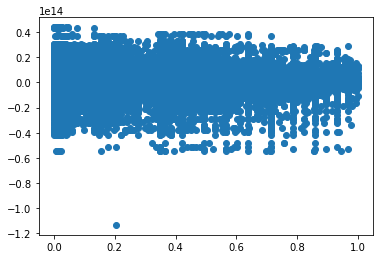

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_val,pred_val)

## Neural Network

In [9]:
#ANN Model

#import keras libraries and modules 
import keras     #backend tensorflow by default

#sequential module required to initialise neural network
from keras.models import Sequential

#dense model required to build layers of ANN
from keras.layers import Dense 

#import dropout class if needed
from keras.layers import Dropout

In [10]:
def build_model():
  #Network architecture
  nn = Sequential()
  nn.add(Dense(units=1024,activation='relu',kernel_initializer='normal',input_dim=X_train.shape[1],))
  nn.add(Dense(units=512,activation='relu'))
  nn.add(Dense(units=256,activation='relu'))
  nn.add(Dense(units=128,activation='relu'))
  nn.add(Dense(units=128,activation='relu'))
  nn.add(Dense(units=64,activation='relu'))
  nn.add(Dense(units=64,activation='relu'))
  nn.add(Dense(units=32,activation='relu'))
  nn.add(Dense(units=16,activation='relu'))
  #classifier.add(Dropout(rate=0.1))

  nn.add(Dense(units=1,kernel_initializer='normal'))
  #compile ANN
  nn.compile(optimizer='adam',loss='mean_squared_error'
          ,metrics=['mae'])
  return nn

In [ ]:
# #K-fold cross validation
# import numpy as np
# k=4
# num_val_samples = len(X_train) // k 
# num_epochs = 100
# all_scores = []
# for i in range(k):
#   print('processing fold #', i)
#   val_data = X_train[i * num_val_samples: (i + 1) * num_val_samples] 
#   val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]
#   partial_train_data = np.concatenate( [X_train[:i * num_val_samples],
#   X_train[(i + 1) * num_val_samples:]], axis=0)
#   partial_train_targets = np.concatenate( [y_train[:i * num_val_samples],
#   y_train[(i + 1) * num_val_samples:]], axis=0)

#   model = build_model()
#   model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1000)
#   val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
#   all_scores.append(val_mae)

In [ ]:
# all_scores

In [11]:
model = build_model()
# model.fit(partial_train_data,partial_train_targets,epochs=num_epochs,batch_size=1000)
history = model.fit(X_train,y_train,epochs=500,batch_size=100)

Epoch 1/500
4443/4443 [==============================] - 11s 3ms/step - loss: 0.0377 - mae: 0.1432
Epoch 2/500
4443/4443 [==============================] - 11s 2ms/step - loss: 0.0351 - mae: 0.1361
Epoch 3/500
4443/4443 [==============================] - 11s 3ms/step - loss: 0.0340 - mae: 0.1330
Epoch 4/500
4443/4443 [==============================] - 11s 3ms/step - loss: 0.0332 - mae: 0.1309
Epoch 5/500
4443/4443 [==============================] - 11s 2ms/step - loss: 0.0327 - mae: 0.1296
Epoch 6/500
4443/4443 [==============================] - 11s 2ms/step - loss: 0.0323 - mae: 0.1286
Epoch 7/500
4443/4443 [==============================] - 11s 2ms/step - loss: 0.0321 - mae: 0.1281
Epoch 8/500
4443/4443 [==============================] - 11s 3ms/step - loss: 0.0319 - mae: 0.1277
Epoch 9/500
4443/4443 [==============================] - 11s 3ms/step - loss: 0.0319 - mae: 0.1273
Epoch 10/500
4443/4443 [==============================] - 11s 3ms/step - loss: 0.0316 - mae: 0.1267
Epoch 11/

In [12]:
model.save('/content/drive/My Drive/Datasets/ecommerce_df.h5')

In [ ]:
val_mse, val_mae = model.evaluate(X_val, y_val, verbose=0)
print(val_mse,val_mae)

0.3272436261177063 0.265689879655838


In [13]:
#training set quality of fit 
pred_train = model.predict(X_train)
pred_train = target_scaler.inverse_transform(pred_train)
print(pred_train)
#Mean squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_scaler.inverse_transform(y_train),pred_train))

from sklearn.metrics import r2_score
print(r2_score(target_scaler.inverse_transform(y_train),pred_train))

[[ 27.652258]
 [385.41812 ]
 [ 75.31057 ]
 ...
 [421.20663 ]
 [373.67673 ]
 [ 27.652258]]
10137.967951808418
0.6365109807229383


In [14]:
#validation set quality of fit 
pred_val = model.predict(X_val)
pred_val = target_scaler.inverse_transform(pred_val)
print(pred_val)
#Mean squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_scaler.inverse_transform(y_val),pred_val))

from sklearn.metrics import r2_score
print(r2_score(target_scaler.inverse_transform(y_val),pred_val))

[[118.77636 ]
 [ 84.5458  ]
 [275.6092  ]
 ...
 [ 27.652258]
 [152.48752 ]
 [206.70256 ]]
14062.909378455424
0.49762400070872503


In [15]:
#test set quality of fit  
pred_test = model.predict(X_test)
pred_test = target_scaler.inverse_transform(pred_test)
print(pred_test)
#Mean squared Error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(target_scaler.inverse_transform(y_test),pred_test))

from sklearn.metrics import r2_score
print(r2_score(target_scaler.inverse_transform(y_test),pred_test))

[[ 27.652258]
 [116.37639 ]
 [421.20663 ]
 ...
 [ 59.831524]
 [ 97.55174 ]
 [ 27.652258]]
14194.939160764314
0.4908466463247977


In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1024)              722944    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 64)                4